In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [2]:
# Read CSV
df = pd.read_csv('Data/airline_final.csv',parse_dates=['date'])

In [3]:
df.head()

,airline_name,author,date,content,type_traveller,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,value_money_rating,recommended,hubs,country
0,adria airways,d ito,2015-04-10,outbound flight fra/prn a319. 2 hours 10 min f...,NaN,economy,7,4,4,4,0,4,4,1,pristina international,kosovo
1,adria airways,ron kuhlmann,2015-01-05,two short hops zrh-lju and lju-vie. very fast ...,NaN,business class,10,4,5,4,1,5,5,1,pristina international,kosovo
2,adria airways,e albin,2014-09-14,flew zurich-ljubljana on jp365 newish crj900. ...,NaN,economy,9,5,5,4,0,5,5,1,pristina international,kosovo
3,adria airways,tercon bojan,2014-09-06,adria serves this 100 min flight from ljubljan...,NaN,business class,8,4,4,3,1,4,4,1,pristina international,kosovo
4,adria airways,l james,2014-06-16,waw-skj economy. no free snacks or drinks on t...,NaN,economy,4,4,2,1,2,2,2,0,pristina international,kosovo


In [4]:
# Check datatype
df.dtypes

airline_name                             object
author                                   object
date                             datetime64[ns]
content                                  object
type_traveller                           object
cabin_flown                              object
overall_rating                            int64
seat_comfort_rating                       int64
cabin_staff_rating                        int64
food_beverages_rating                     int64
inflight_entertainment_rating             int64
ground_service_rating                     int64
value_money_rating                        int64
recommended                               int64
hubs                                     object
country                                  object
dtype: object

In [5]:
# Count occurance by year
df['date'].dt.year.value_counts().sort_index()

1970        1
2007      161
2008      400
2009      591
2010     1570
2011     3270
2012     4873
2013     8883
2014    14411
2015    13300
2016     9003
2017     8736
2018    10622
2019     4429
2020      270
Name: date, dtype: int64

In [6]:
# Remove the only 1 review in 1970
df = df[df.date.dt.year != 1970]

### Number of Occurances per year
Here we can see that there's a high imbalance in number of occurances per year. This will be taken into considerations during analysis later on.

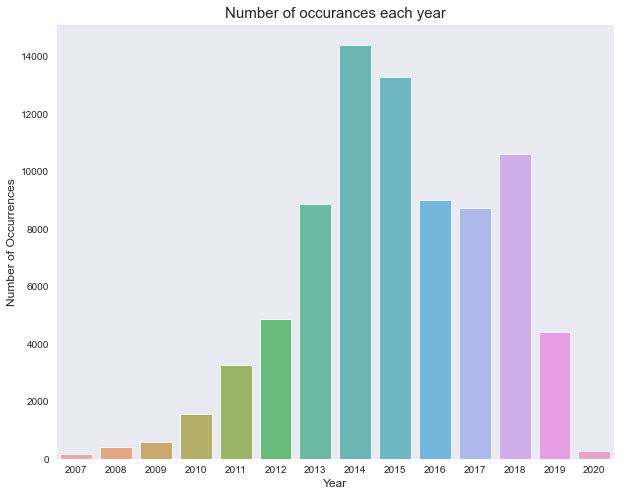

In [7]:
# Plot occurance per year
datebyyear = df['date'].dt.year.value_counts().sort_index()
plt.figure(figsize=[10,8])
sns.set_style("dark")
sns.barplot(datebyyear.index, datebyyear.values, alpha=0.8)
plt.title('Number of occurances each year',fontsize=15)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

### Respective ratings per year

The overall ratings is a sentiment of how the user perceived the overall quality in terms of service and attitude of the respective airlines. Looking at the mean overall rating per year as a whole, we can see that the ratings has slid drastically since 2011. This doesn't show positivity as it could mean that the overall standards of the airlines has dropped, else the expectations of the users has increased. The charts shows that this applies to the rest of the ratings including comfort, seats, entertainment and meals.

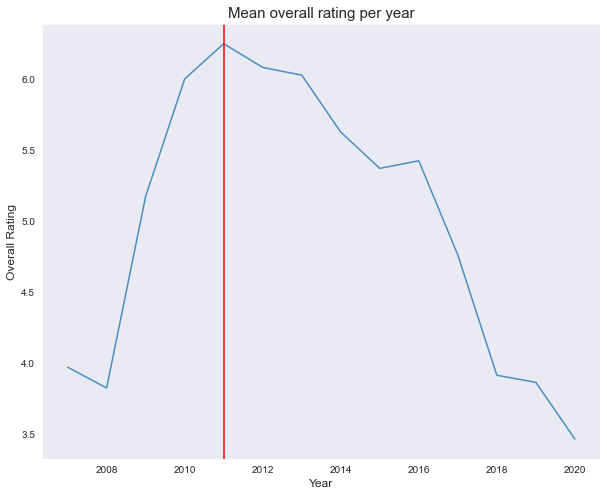

In [8]:
date_overall_rating = df.groupby(df.date.dt.year)['overall_rating'].mean().sort_index()
plt.figure(figsize=[10,8])
sns.lineplot(date_overall_rating.index, date_overall_rating.values, alpha=0.8)
plt.title('Mean overall rating per year',fontsize=15)
plt.ylabel('Overall Rating', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.axvline(x=2011,c='red')
plt.show()

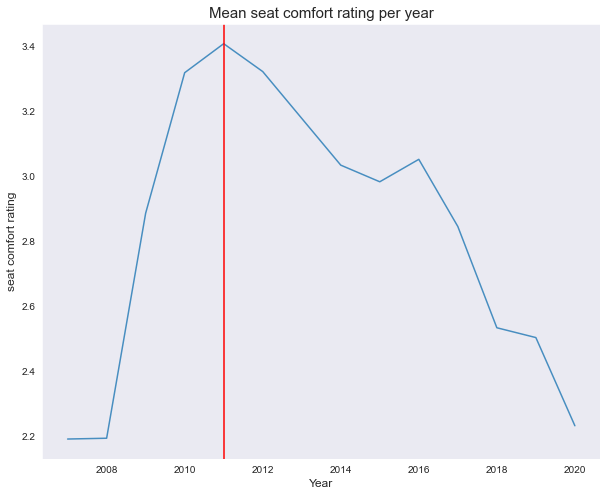

In [9]:
date_overall_rating = df.groupby(df.date.dt.year)['seat_comfort_rating'].mean().sort_index()
plt.figure(figsize=[10,8])
sns.lineplot(date_overall_rating.index, date_overall_rating.values, alpha=0.8)
plt.title('Mean seat comfort rating per year',fontsize=15)
plt.ylabel('seat comfort rating', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.axvline(x=2011,c='red')
plt.show()

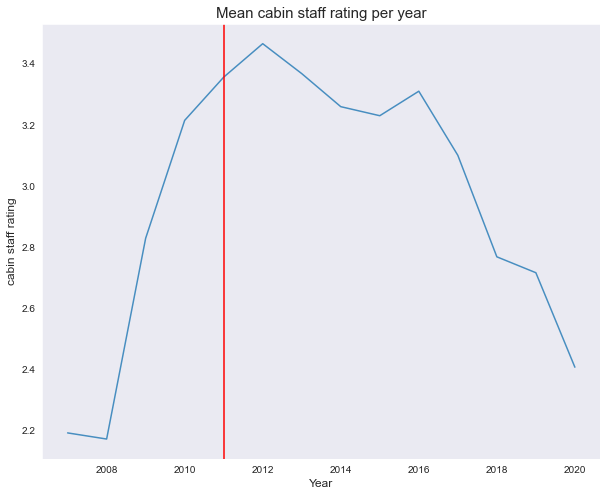

In [10]:
date_overall_rating = df.groupby(df.date.dt.year)['cabin_staff_rating'].mean().sort_index()
plt.figure(figsize=[10,8])
sns.lineplot(date_overall_rating.index, date_overall_rating.values, alpha=0.8)
plt.title('Mean cabin staff rating per year',fontsize=15)
plt.ylabel('cabin staff rating', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.axvline(x=2011,c='red')
plt.show()

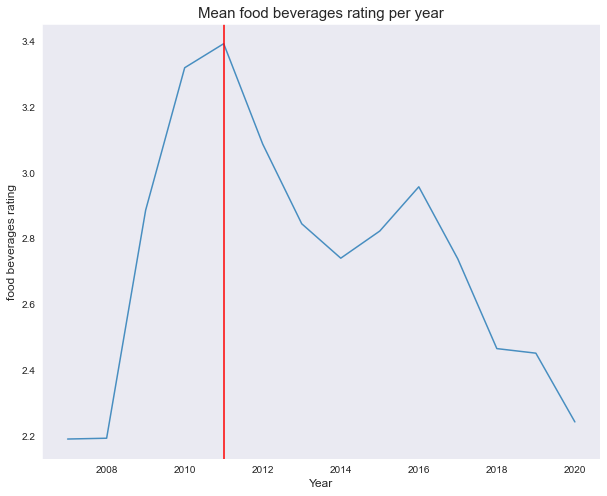

In [11]:
date_overall_rating = df.groupby(df.date.dt.year)['food_beverages_rating'].mean().sort_index()
plt.figure(figsize=[10,8])
sns.lineplot(date_overall_rating.index, date_overall_rating.values, alpha=0.8)
plt.title('Mean food beverages rating per year',fontsize=15)
plt.ylabel('food beverages rating', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.axvline(x=2011,c='red')
plt.show()

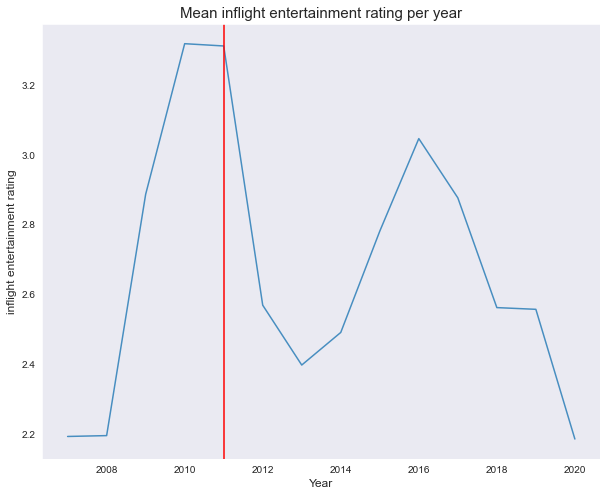

In [12]:
date_overall_rating = df.groupby(df.date.dt.year)['inflight_entertainment_rating'].mean().sort_index()
plt.figure(figsize=[10,8])
sns.lineplot(date_overall_rating.index, date_overall_rating.values, alpha=0.8)
plt.title('Mean inflight entertainment rating per year',fontsize=15)
plt.ylabel('inflight entertainment rating', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.axvline(x=2011,c='red')
plt.show()

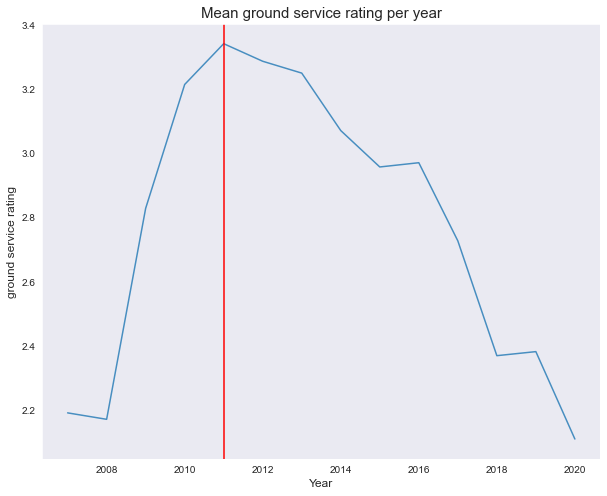

In [13]:
date_overall_rating = df.groupby(df.date.dt.year)['ground_service_rating'].mean().sort_index()
plt.figure(figsize=[10,8])
sns.lineplot(date_overall_rating.index, date_overall_rating.values, alpha=0.8)
plt.title('Mean ground service rating per year',fontsize=15)
plt.ylabel('ground service rating', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.axvline(x=2011,c='red')
plt.show()

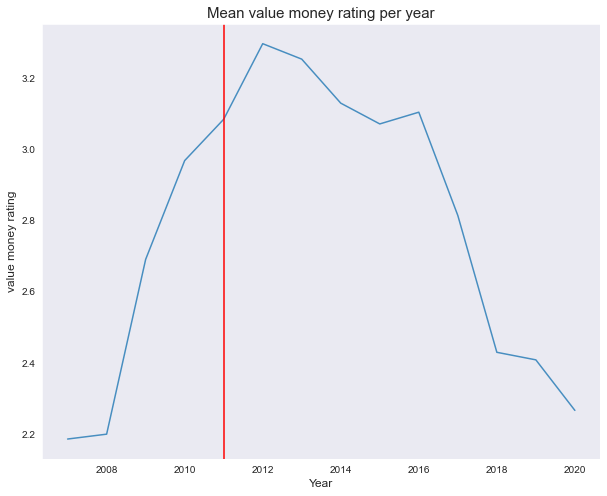

In [14]:
date_overall_rating = df.groupby(df.date.dt.year)['value_money_rating'].mean().sort_index()
plt.figure(figsize=[10,8])
sns.lineplot(date_overall_rating.index, date_overall_rating.values, alpha=0.8)
plt.title('Mean value money rating per year',fontsize=15)
plt.ylabel('value money rating', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.axvline(x=2011,c='red')
plt.show()

### Singapore Airlines
Singapore airline is ranked one of the top airlines in the world. However according to the charts, it shows that the mean overall rating has dropped from a high score of 8 in 2013 to a score of less than 6 in 2020. 

In [2]:
df2 = pd.read_csv('Data/EDA.csv',parse_dates=['date'])

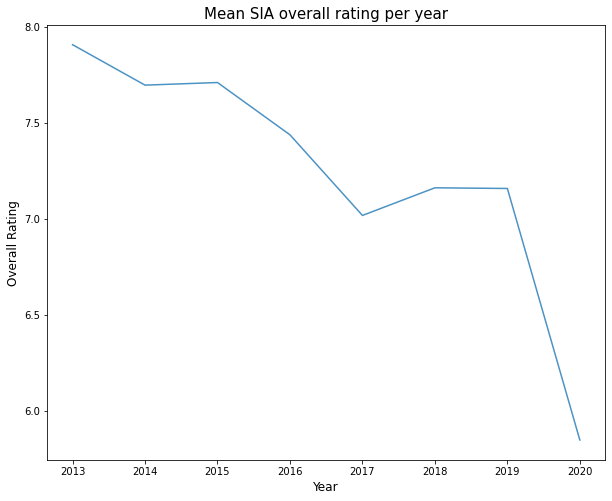

In [3]:
sia_rating = df2[df2['airline_name'] == 'singapore airlines'].groupby(df2.date.dt.year)['overall_rating'].mean().sort_index()
plt.figure(figsize=[10,8])
sns.lineplot(sia_rating.index, sia_rating.values, alpha=0.8)
plt.title('Mean SIA overall rating per year',fontsize=15)
plt.ylabel('Overall Rating', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

In [17]:
df2[df2['airline_name'] == 'singapore airlines'].groupby(df2.date.dt.year)['overall_rating'].mean().sort_index()

date
2013    7.908451
2014    7.697561
2015    7.711230
2016    7.438596
2017    7.018293
2018    7.162338
2019    7.158879
2020    5.847458
Name: overall_rating, dtype: float64

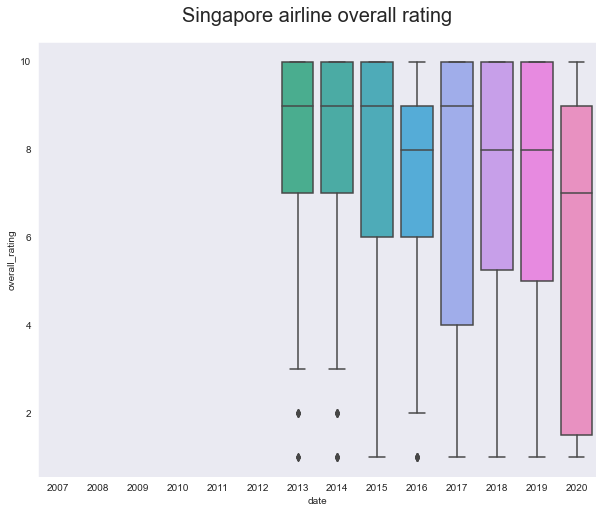

In [18]:
fig,ax = plt.subplots(figsize=(10,8))

sns.boxplot(
    x=df2.date.dt.year,
    y='overall_rating',
    data=df2[df2['airline_name'] == 'singapore airlines']
)

ax.set_title('Singapore airline overall rating',fontsize=20,pad=20);

### Vistara

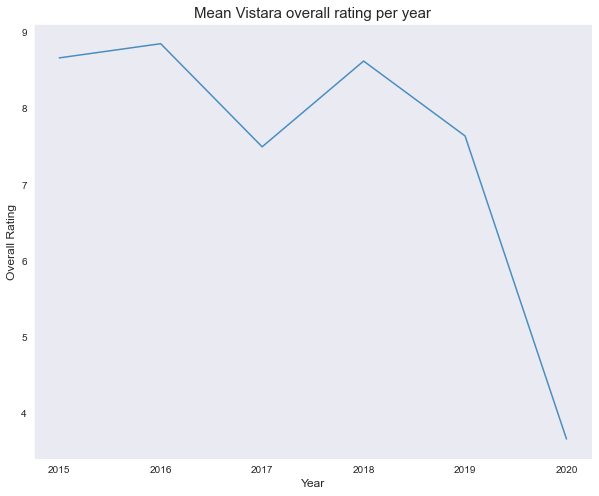

In [19]:
vistara_rating = df[df['airline_name'] == 'vistara'].groupby(df.date.dt.year)['overall_rating'].mean().sort_index()
plt.figure(figsize=[10,8])
sns.lineplot(vistara_rating.index, vistara_rating.values, alpha=0.8)
plt.title('Mean Vistara overall rating per year',fontsize=15)
plt.ylabel('Overall Rating', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

### Qatar airways

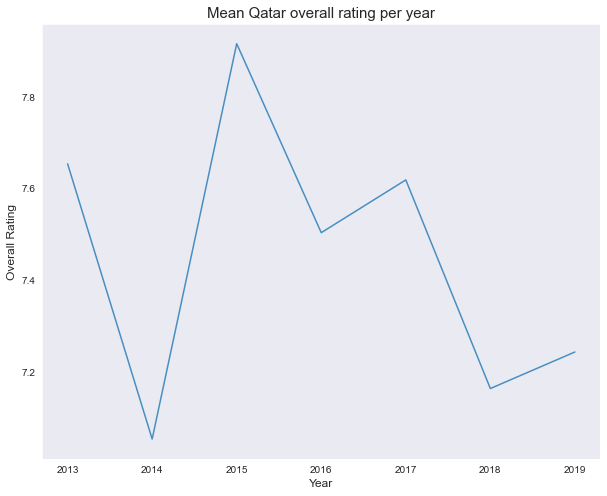

In [20]:
qatar_rating = df[df['airline_name'] == 'qatar airways'].groupby(df.date.dt.year)['overall_rating'].mean().sort_index()
plt.figure(figsize=[10,8])
sns.lineplot(qatar_rating.index, qatar_rating.values, alpha=0.8)
plt.title('Mean Qatar overall rating per year',fontsize=15)
plt.ylabel('Overall Rating', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

### Aegean Airlines

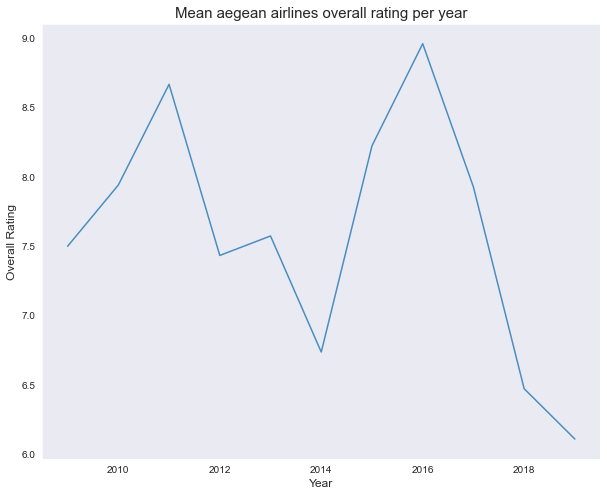

In [21]:
aegean_airlines_rating = df[df['airline_name'] == 'aegean airlines'].groupby(df.date.dt.year)['overall_rating'].mean().sort_index()
plt.figure(figsize=[10,8])
sns.lineplot(aegean_airlines_rating.index, aegean_airlines_rating.values, alpha=0.8)
plt.title('Mean aegean airlines overall rating per year',fontsize=15)
plt.ylabel('Overall Rating', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

### ANA 
Despite the mean overall rating as a whole is on a slide, but ANA showed otherwise.

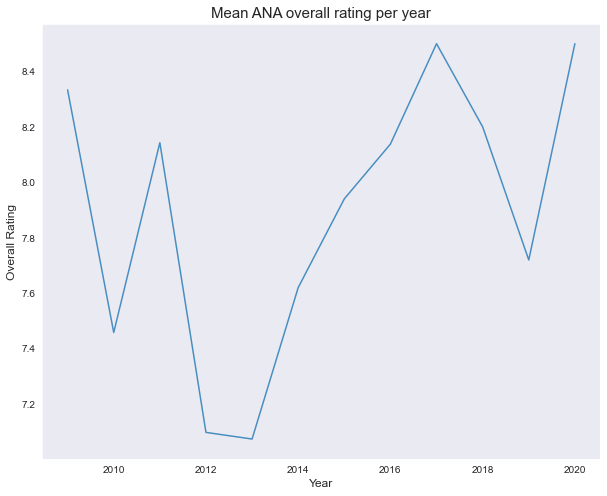

In [22]:
ana_rating = df[df['airline_name'] == 'ana all nippon airways'].groupby(df.date.dt.year)['overall_rating'].mean().sort_index()
plt.figure(figsize=[10,8])
sns.lineplot(ana_rating.index, ana_rating.values, alpha=0.8)
plt.title('Mean ANA overall rating per year',fontsize=15)
plt.ylabel('Overall Rating', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

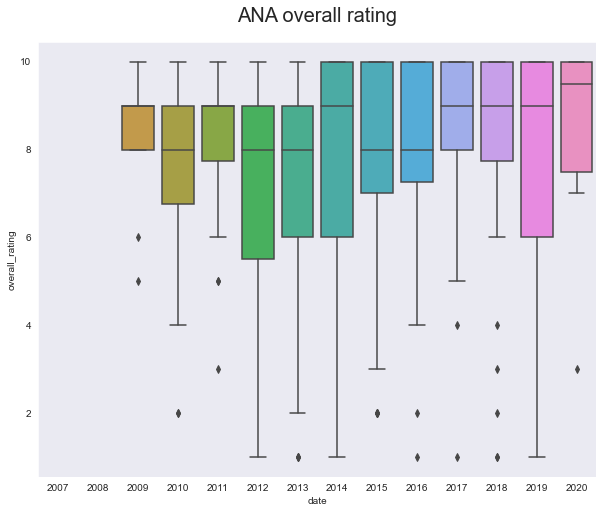

In [23]:
fig,ax = plt.subplots(figsize=(10,8))

sns.boxplot(
    x=df.date.dt.year,
    y='overall_rating',
    data=df[df['airline_name'] == 'ana all nippon airways']
)

ax.set_title('ANA overall rating',fontsize=20,pad=20);

Here we investigate the rest of the Japan airlines 

In [24]:
df[df['country']=='japan']['airline_name'].unique()

array(['ana all nippon airways', 'japan airlines', 'peach aviation',
       'skymark airlines', 'starflyer', 'vanilla air'], dtype=object)

### Japan Airlines

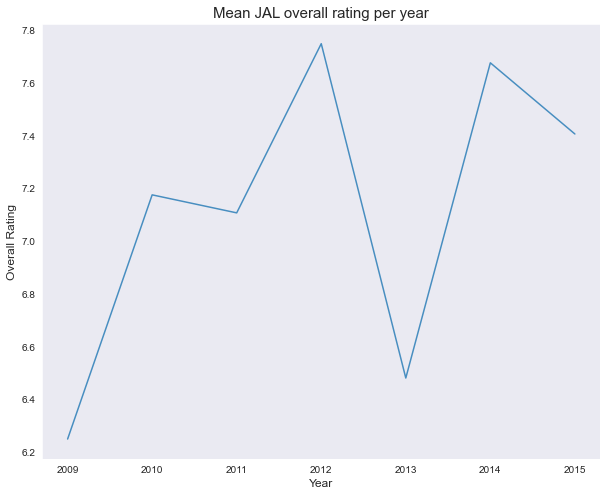

In [25]:
jal_rating = df[df['airline_name'] == 'japan airlines'].groupby(df.date.dt.year)['overall_rating'].mean().sort_index()
plt.figure(figsize=[10,8])
sns.lineplot(jal_rating.index, jal_rating.values, alpha=0.8)
plt.title('Mean JAL overall rating per year',fontsize=15)
plt.ylabel('Overall Rating', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

In [26]:
df.head()

,airline_name,author,date,content,type_traveller,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,value_money_rating,recommended,hubs,country
0,adria airways,d ito,2015-04-10,outbound flight fra/prn a319. 2 hours 10 min f...,NaN,economy,7,4,4,4,0,4,4,1,pristina international,kosovo
1,adria airways,ron kuhlmann,2015-01-05,two short hops zrh-lju and lju-vie. very fast ...,NaN,business class,10,4,5,4,1,5,5,1,pristina international,kosovo
2,adria airways,e albin,2014-09-14,flew zurich-ljubljana on jp365 newish crj900. ...,NaN,economy,9,5,5,4,0,5,5,1,pristina international,kosovo
3,adria airways,tercon bojan,2014-09-06,adria serves this 100 min flight from ljubljan...,NaN,business class,8,4,4,3,1,4,4,1,pristina international,kosovo
4,adria airways,l james,2014-06-16,waw-skj economy. no free snacks or drinks on t...,NaN,economy,4,4,2,1,2,2,2,0,pristina international,kosovo


In [28]:
df.groupby('airline_name')['recommended'].value_counts(normalize=True)['qatar airways']

recommended
1    0.786765
0    0.213235
Name: recommended, dtype: float64

In [29]:
df.groupby('airline_name')['recommended'].value_counts(normalize=True)['singapore airlines']

recommended
1    0.780533
0    0.219467
Name: recommended, dtype: float64

In [30]:
df.groupby('airline_name')['recommended'].value_counts(normalize=True)['ana all nippon airways']

recommended
1    0.831373
0    0.168627
Name: recommended, dtype: float64

In [31]:
df.groupby('airline_name')['recommended'].value_counts(normalize=True)['vistara']

recommended
1    0.809917
0    0.190083
Name: recommended, dtype: float64